<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day_7(ii)_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

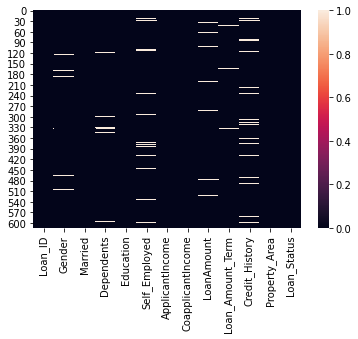

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#Dropping Loan-ID
data.drop("Loan_ID",axis=1,inplace=True)

In [12]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


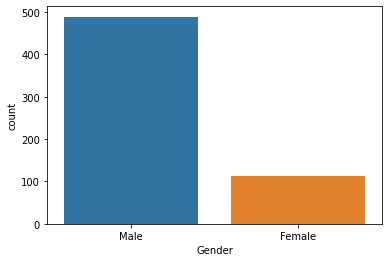

In [15]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


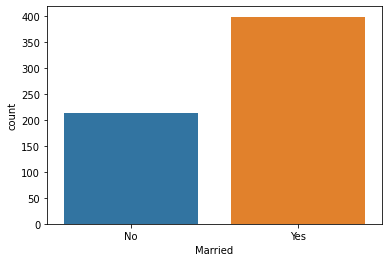

In [16]:
sns.countplot(data['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


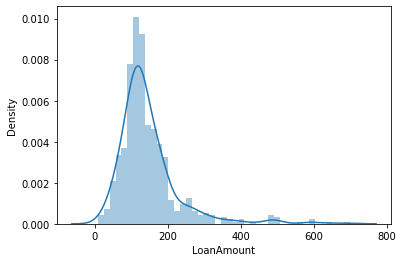

In [18]:
#distplot for loan amount
sns.distplot(data['LoanAmount'])

In [19]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#Filling the misssing value with random values
data.fillna({'Gender':"Male",
              "Married":"Yes",
                "Dependents":"0",
                "Self-Employed":"No",
             "LoanAmount": data['LoanAmount'].mean(),
             "Loan_Amount_Term" : data['Loan_Amount_Term'].mean(),
             "Credit_History":1
},inplace=True)

In [21]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#mapping the loan status in numerical formatt

data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [23]:
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [27]:
#dummy variiable
cat_col=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
df=pd.get_dummies(data[cat_col],drop_first=True)

In [28]:
df

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0
610,1,1,0,0,1,0,0,0,0
611,1,1,1,0,0,0,0,0,1
612,1,1,0,1,0,0,0,0,1


In [29]:
data.drop(cat_col,axis=1,inplace=True)

In [30]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1
1,4583,1508.0,128.000000,360.0,1.0,0
2,3000,0.0,66.000000,360.0,1.0,1
3,2583,2358.0,120.000000,360.0,1.0,1
4,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1
610,4106,0.0,40.000000,180.0,1.0,1
611,8072,240.0,253.000000,360.0,1.0,1
612,7583,0.0,187.000000,360.0,1.0,1


In [31]:
#Min-max scalar give value bet 1 and 0
#standard scalar give values in negative
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[num_cols]=scale.fit_transform(data[num_cols])

In [33]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.070489,0.000000,0.198860,0.74359,1.0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1


In [34]:
#New dataset by concating
new_data=pd.concat([df,data],axis=1)

In [35]:
new_data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0,1
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0,1
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0,1
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0,1


In [36]:
#new x and y
x=new_data.drop(['Loan_Status'],axis=1)
y=new_data['Loan_Status']

In [37]:
#splitting the traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
#Logistic regg
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,recall_score
y_pred=model.predict(x_test) 

In [51]:
new_data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0,1
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0,1
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0,1
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0,1


In [43]:
print("Testing acc",accuracy_score(y_test,y_pred))

Testing acc 0.8311688311688312


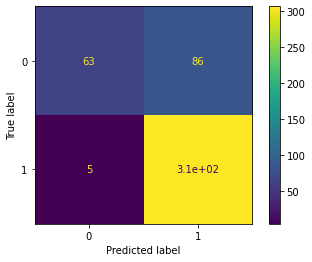

In [46]:
#confusion matrix
plot_confusion_matrix(model,x_train,y_train)